In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

In [2]:
train_df= pd.read_csv('titanic_train.csv')
test_df= pd.read_csv('titanic_test.csv')
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()
print('-'*70)
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
----------------------------------------------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
print(train_df.columns)
print('-'*80)
test_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
--------------------------------------------------------------------------------


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_data=train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_data=test_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex']) #male -1 and female-0
test_data['Sex']=le.fit_transform(test_data['Sex'])

In [10]:
cols=['Pclass','Sex','SibSp','Parch','Embarked']
for col in cols:
    print(train_data[[col, 'Survived']].groupby([col], as_index=False).mean().sort_values(by='Survived',ascending=False))
    print('-'*30)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------------
   Sex  Survived
0    0  0.742038
1    1  0.188908
------------------------------
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------------------
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
------------------------------
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
------------------------------


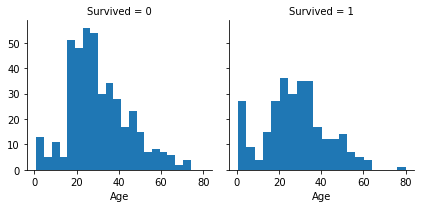

In [11]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

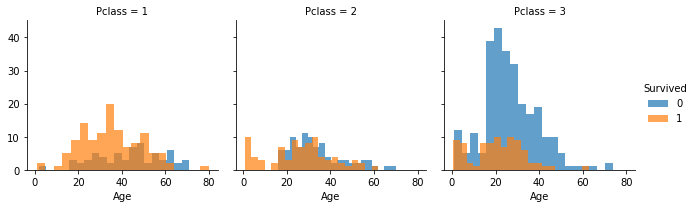

In [12]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.7, bins=20)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


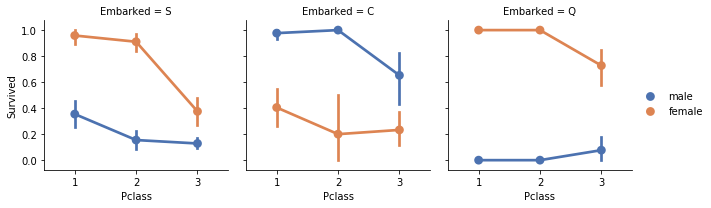

In [13]:
grid = sns.FacetGrid(train_df, col='Embarked')
#grid = sns.FacetGrid(train_df, row='Embarked', height=2, aspect=1.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


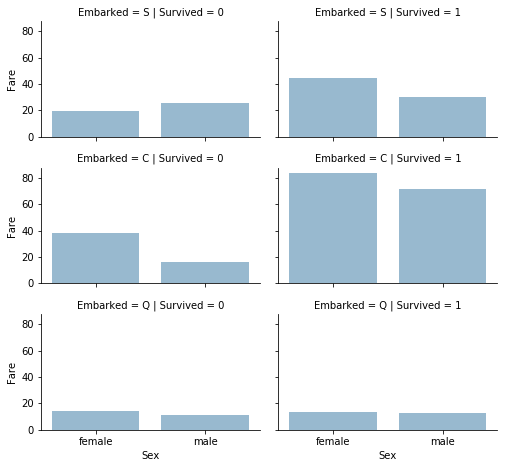

In [14]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [15]:
# filling missing values of embarked feature for train data
emb_freq= train_df.Embarked.mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(emb_freq)
le=LabelEncoder()
train_data['Embarked']=le.fit_transform(train_data['Embarked'])# c=0, Q=1 ,S=2

# converting categorical embarked to integer values
test_data['Embarked']=le.fit_transform(test_data['Embarked'])


In [16]:
# filling missing values of age and creating a ordinal data for age group
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()).astype(int)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean()).astype(int)


In [17]:
train_data.loc[train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[train_data['Age'] > 64, 'Age']= 4
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,7.2500,2
1,1,1,0,2,1,0,71.2833,0
2,1,3,0,1,0,0,7.9250,2
3,1,1,0,2,1,0,53.1000,2
4,0,3,1,2,0,0,8.0500,2


In [18]:
test_data.loc[test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[test_data['Age'] > 64, 'Age'] = 4
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,7.8292,1
1,3,0,2,1,0,7.0000,2
2,2,1,3,0,0,9.6875,1
3,3,1,1,0,0,8.6625,2
4,3,0,1,1,1,12.2875,2


In [19]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 3)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], 
                as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [20]:
train_data.loc[train_data['Fare'] <= 8.662,'Fare'] = 0
train_data.loc[(train_data['Fare'] > 8.662) & (train_data['Fare'] <=26.0), 'Fare'] = 1
train_data.loc[train_data['Fare'] > 26.0,'Fare'] = 2
train_data['Fare']=train_data['Fare'].astype(int)
train_data=train_data.drop(['FareBand'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,0,2
1,1,1,0,2,1,0,2,0
2,1,3,0,1,0,0,0,2
3,1,1,0,2,1,0,2,2
4,0,3,1,2,0,0,0,2


In [21]:
test_data['Fare']=test_data['Fare'].replace(np.nan,test_data['Fare'].mean())
test_data.loc[test_data['Fare'] <= 8.662, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 8.662) & (test_data['Fare'] <=26.0), 'Fare'] = 1
test_data.loc[test_data['Fare'] > 26.0, 'Fare'] = 2
test_data['Fare']=test_data['Fare'].astype(int)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,0,1
1,3,0,2,1,0,0,2
2,2,1,3,0,0,1,1
3,3,1,1,0,0,1,2
4,3,0,1,1,1,1,2


In [22]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,0,2
1,1,1,0,2,1,0,2,0
2,1,3,0,1,0,0,0,2
3,1,1,0,2,1,0,2,2
4,0,3,1,2,0,0,0,2


In [23]:
x_train=train_data.drop(['Survived'],axis=1)
y_train=train_data['Survived']
x_test=test_data

In [24]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_score=lr.score(x_train,y_train)
lr_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7912457912457912

In [25]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn_score=knn.score(x_train,y_train)
knn_score

0.8428731762065096

In [26]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb_score=mnb.score(x_train,y_train)
mnb_score

0.7115600448933782

In [27]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_score=dtc.score(x_train,y_train)
dtc_score

0.8731762065095399

In [28]:
svc=SVC(gamma='auto')
svc.fit(x_train,y_train)
svc_score=svc.score(x_train,y_train)
svc_score

0.8282828282828283

In [29]:
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)
rfc_score

0.8731762065095399

In [32]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_score=abc.score(x_train,y_train)
abc_score

0.8024691358024691

In [33]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_score=gbc.score(x_train,y_train)
gbc_score

0.8406285072951739

In [34]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'Decision Tree','AdaBoost'],
    'Score': [svc_score,knn_score,lr_score, rfc_score,mnb_score, gbc_score, dtc_score,abc_score ]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,0.873176
6,Decision Tree,0.873176
1,KNN,0.842873
5,Gradient Boosting,0.840629
0,Support Vector Machines,0.828283
7,AdaBoost,0.802469
2,Logistic Regression,0.791246
4,Naive Bayes,0.711560


In [35]:
# saving the best model
import pickle
pickle.dump(rfc,open('final_model.obj','wb'))

In [36]:
# predicting the result using saved best model
model=pickle.load(open('final_model.obj','rb'))
best_score=model.score(x_train,y_train)
pred= model.predict(x_test)


In [37]:
# final result
final=pd.DataFrame({
                    "PassengerId": test_df['PassengerId'],
                    'Survived': pred
                   })
final.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
